In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nmnbabbar/loan-approval")

print("Path to dataset files:", path)

100%|██████████| 11.0k/11.0k [00:00<00:00, 9.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nmnbabbar/loan-approval/versions/1


In [3]:
la=pd.read_csv("/root/.cache/kagglehub/datasets/nmnbabbar/loan-approval/versions/1/1loan_approval.csv")

In [4]:
print(la)

     ApplicantID  Income  Credit Score  Loan Amount Approval Status
0              1   67669           492        21632        Rejected
1              2  111550           816        45981        Approved
2              3   51470           611        34096        Rejected
3              4   94277           844        45679        Rejected
4              5   78266           665        33423        Rejected
..           ...     ...           ...          ...             ...
995          996  107583           686        48654        Approved
996          997   42186           343        11958        Rejected
997          998  127169           813        31523        Rejected
998          999  130056           760         7554        Rejected
999         1000   50494           306        37564        Rejected

[1000 rows x 5 columns]


In [5]:
la.head()

,ApplicantID,Income,Credit Score,Loan Amount,Approval Status
0,1,67669,492,21632,Rejected
1,2,111550,816,45981,Approved
2,3,51470,611,34096,Rejected
3,4,94277,844,45679,Rejected
4,5,78266,665,33423,Rejected


In [6]:
la.tail()

,ApplicantID,Income,Credit Score,Loan Amount,Approval Status
995,996,107583,686,48654,Approved
996,997,42186,343,11958,Rejected
997,998,127169,813,31523,Rejected
998,999,130056,760,7554,Rejected
999,1000,50494,306,37564,Rejected


In [7]:
la.isnull().sum()

,0
ApplicantID,0
Income,0
Credit Score,0
Loan Amount,0
Approval Status,0


In [8]:
ind=la[["Income","Credit Score","Loan Amount"]]
dep=la["Approval Status"]

In [9]:
Logr=LogisticRegression()
Logr.fit(ind,dep)

LogisticRegression()

In [10]:
Income=int(input("enter the income:"))
CreditScore=int(input("enter the Cresitscore:"))
Loanamount=int(input("enter the Loan amount:"))
pred=Logr.predict([[Income,CreditScore,Loanamount,]])
print(pred)

enter the income:67669
enter the Cresitscore:107583
enter the Loan amount:458695
['Approved']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
Logr.score(ind,dep)

0.544

In [12]:
from sklearn.metrics import accuracy_score
pval=Logr.predict(ind)
accuracy_score(dep,pval)

0.544

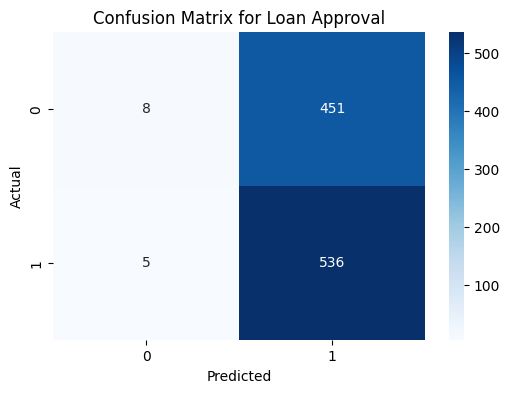

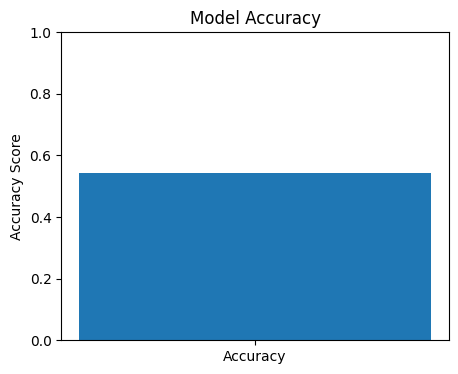

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions
y_pred = Logr.predict(ind)

# Confusion Matrix
cm = confusion_matrix(dep, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix for Loan Approval")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy graph
accuracy = accuracy_score(dep, y_pred)

plt.figure(figsize=(5,4))
plt.bar(["Accuracy"], [accuracy])
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()
